<a href="https://colab.research.google.com/github/chiku27/ML1/blob/master/Car_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 69 bytes


In [64]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [65]:
!kaggle datasets download -d orgesleka/used-cars-database

used-cars-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
from zipfile import ZipFile
file_name="used-cars-database.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df=pd.read_csv("/content/autos.csv",encoding="ISO-8859-1")
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [69]:
df.shape

(371528, 20)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [71]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [72]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [73]:
df['notRepairedDamage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

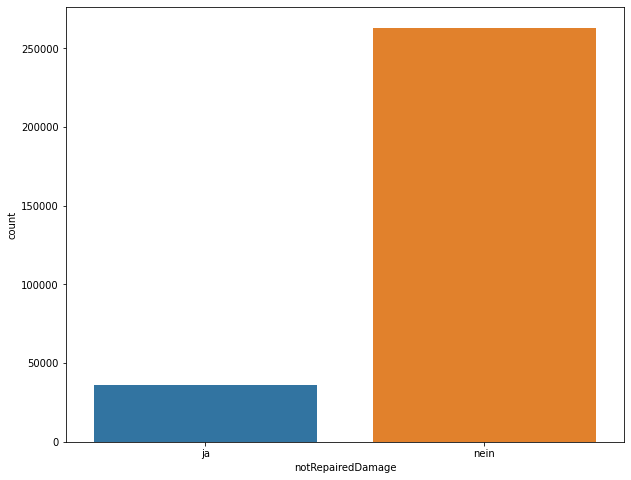

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(df['notRepairedDamage'])

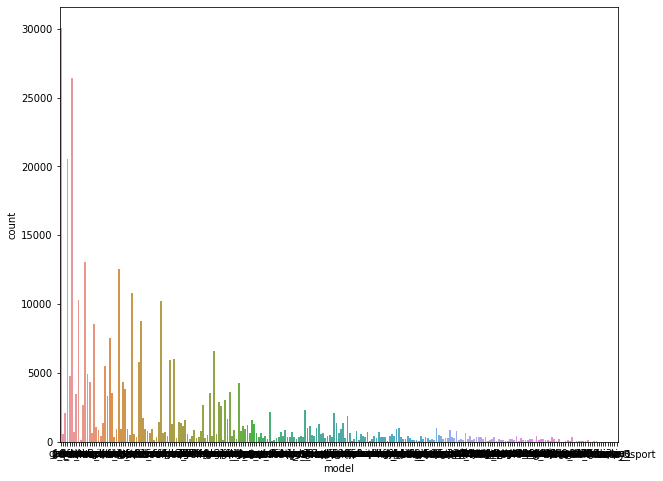

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(df['model'])

In [76]:
max(df['model'].value_counts())

30070

In [77]:
df['model'].value_counts()

golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

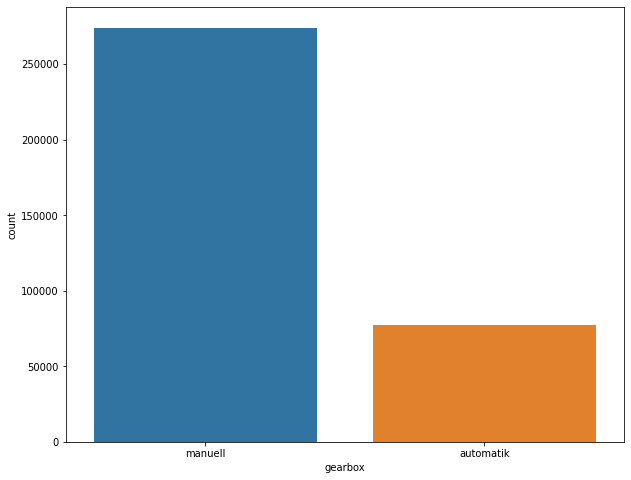

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(df['gearbox'])

But the gearbox varies with the brand type so that we will do now

In [0]:
gearbox=df['gearbox'].unique()
brand=df['brand'].unique()
new={}
for i in brand:
  m=0
  for j in gearbox:
    if df[(df.gearbox==j) & (df.brand==i)].shape[0] > m:  #it matches the gerabox type with brand and then associate that with a tuple
      m=df[(df.gearbox==j) & (df.brand==i)].shape[0]
      new[i]=j

for i in brand :
    df.loc[(df.brand == i) & (df.gearbox.isnull()) ,'gearbox' ] = new[i]

In [0]:
df['model'].fillna('golf',inplace=True)
df['notRepairedDamage'].fillna('nein',inplace=True)

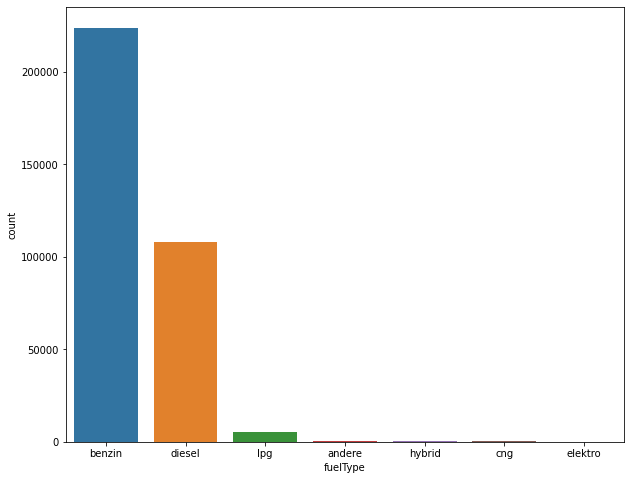

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(df['fuelType'])

In [0]:
df['fuelType'].fillna('benzin',inplace=True)

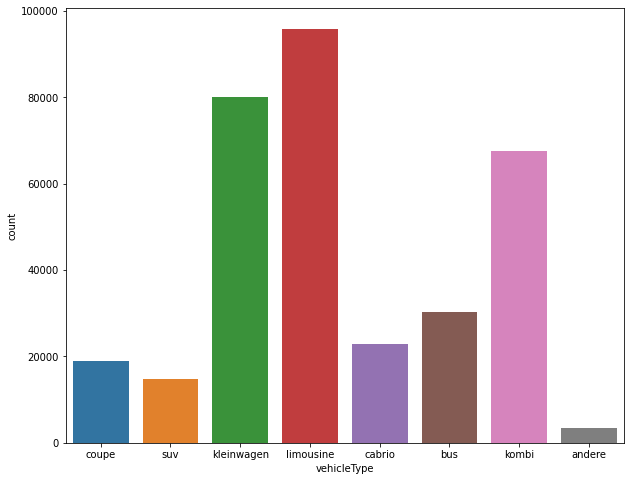

In [83]:
plt.figure(figsize=(10,8))
sns.countplot(df['vehicleType'])

In [84]:
vehicle=df['vehicleType'].unique()
fuel=df['fuelType'].unique()
print(vehicle)

[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [85]:
print(fuel)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


In [86]:
vehicle=vehicle[1:]
print(vehicle)

['coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere']


In [0]:
new2={}
for i in fuel:
  n=0
  for j in vehicle:
    if df[(df.vehicleType==j) & (df.fuelType==i)].shape[0] > n:  
      n=df[(df.vehicleType==j) & (df.fuelType==i)].shape[0]
      new2[i]=j



In [88]:
new2

{'andere': 'limousine',
 'benzin': 'kleinwagen',
 'cng': 'bus',
 'diesel': 'kombi',
 'elektro': 'kleinwagen',
 'hybrid': 'limousine',
 'lpg': 'limousine'}

In [0]:
for i in fuel :
    df.loc[(df.fuelType == i) & (df.vehicleType.isnull()) ,'vehicleType' ] = new2[i]

In [90]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

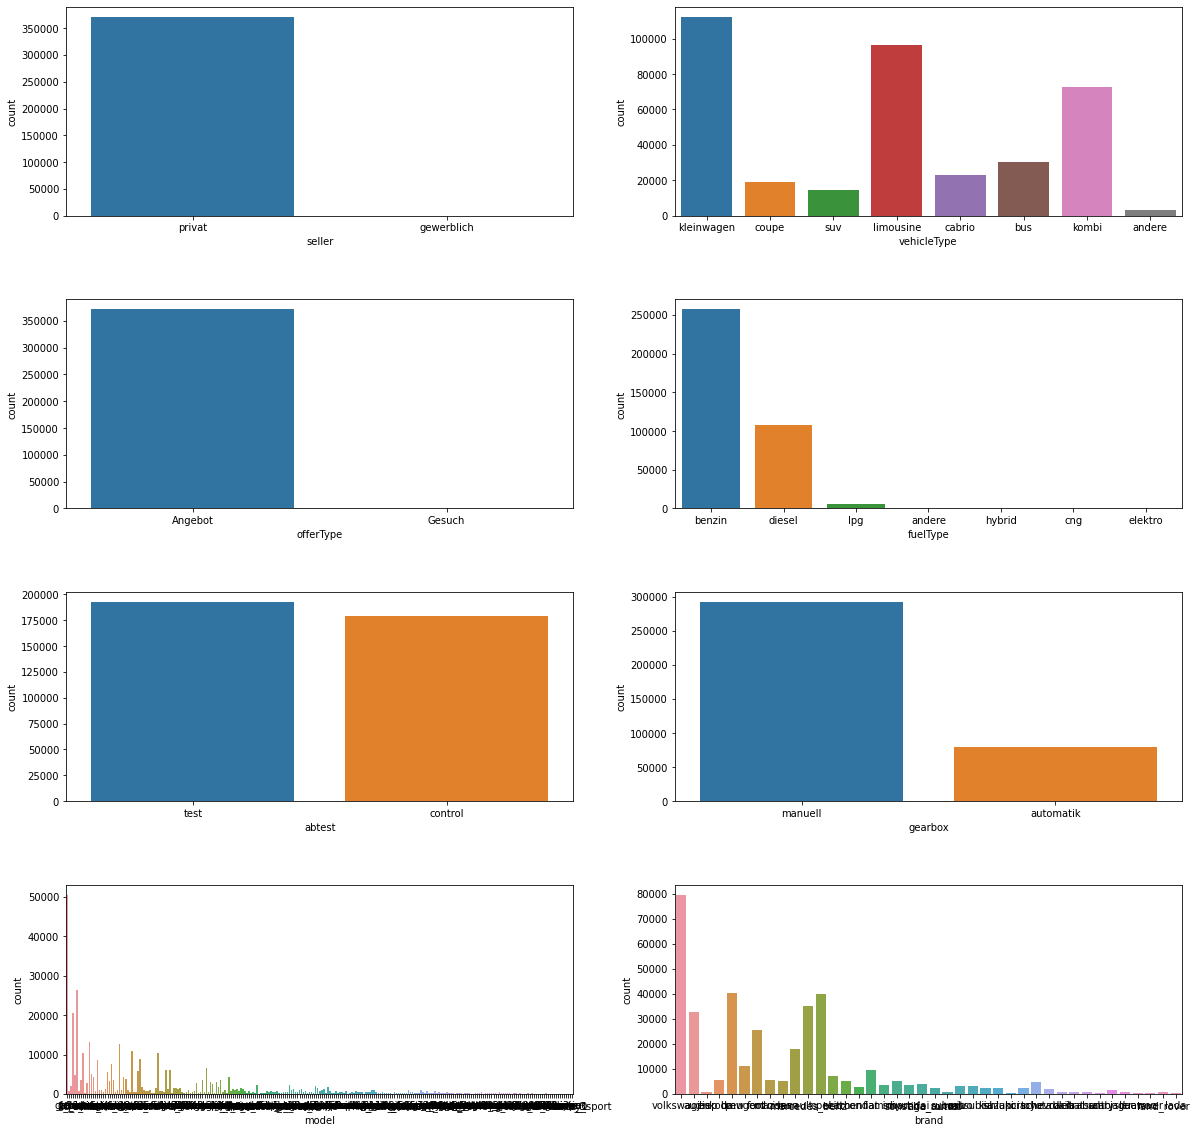

In [91]:
fig,axes=plt.subplots(4,2,figsize=(20,20))
sns.countplot(df['seller'],ax=axes[0][0])
sns.countplot(df['vehicleType'],ax=axes[0][1])
sns.countplot(df['offerType'],ax=axes[1][0])
sns.countplot(df['fuelType'],ax=axes[1][1])
sns.countplot(df['abtest'],ax=axes[2][0])
sns.countplot(df['gearbox'],ax=axes[2][1])
sns.countplot(df['model'],ax=axes[3][0])
sns.countplot(df['brand'],ax=axes[3][1])
plt.subplots_adjust(hspace=0.4)

From the countplots of different attributes we concluded that seller and offerType columns won't affect much to our results as they contain majority of rows of a paricular type.

In [92]:
df.drop(columns=['seller','offerType'],axis=1,inplace=True)
df.shape

(371528, 18)

In [93]:
df.head(2)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


The name column contains the headline of the car.There are 3 columns corresponding to date namely dateCrawled,dateCreated,lastSeen.We can't derive much data from this  columns so it's better to drop them

In [94]:
df.drop(columns=['dateCrawled','dateCreated','lastSeen','name'],axis=1,inplace=True)
df.shape

(371528, 14)

In [95]:
df.head(2)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode
0,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,0,70435
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,0,66954


In [96]:
df['nrOfPictures'].unique()

array([0])

In [97]:
df.drop(columns=['nrOfPictures'],axis=1,inplace=True)
df.shape

(371528, 13)

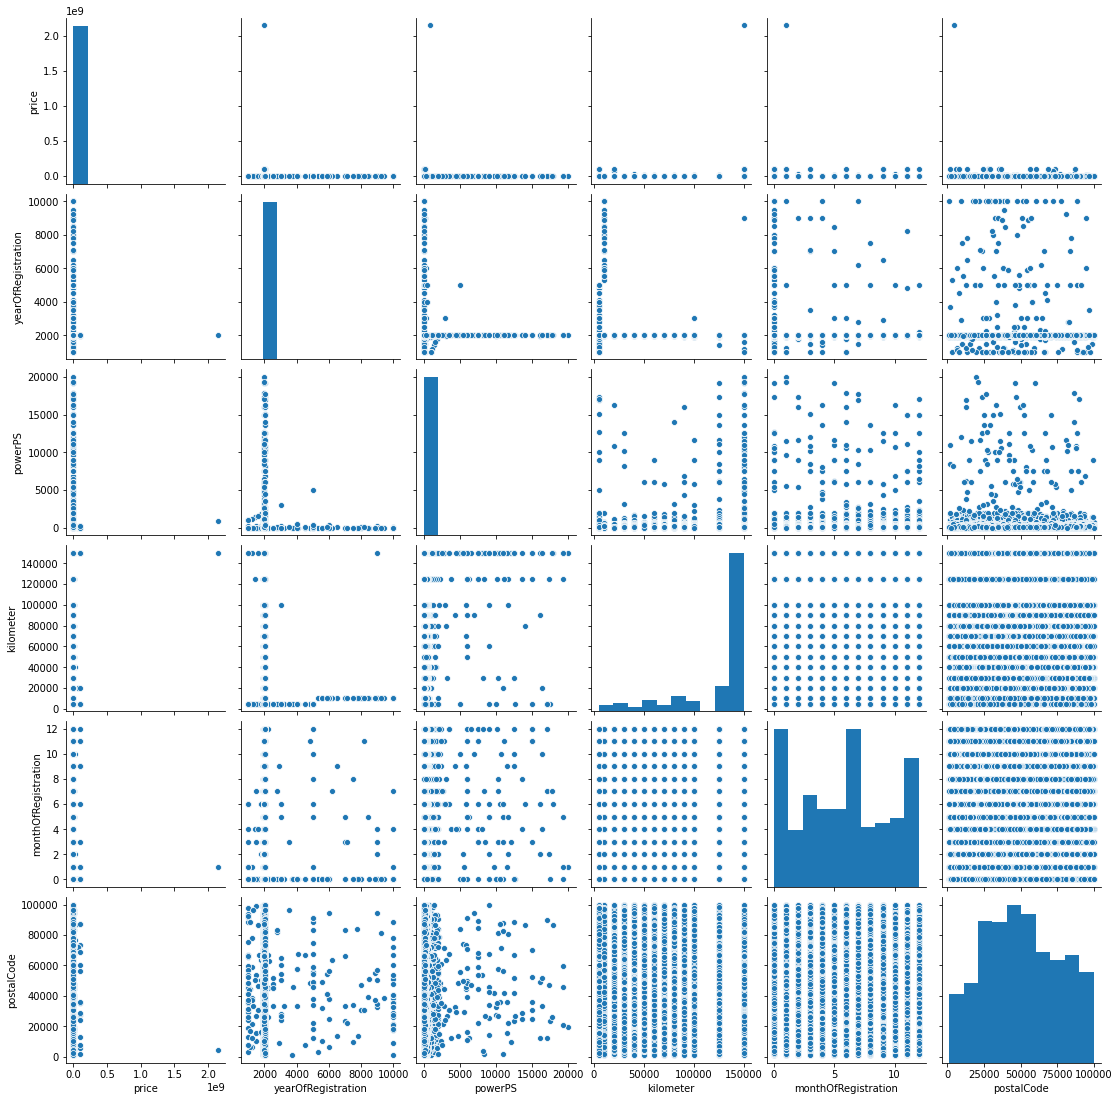

In [98]:
sns.pairplot(df)

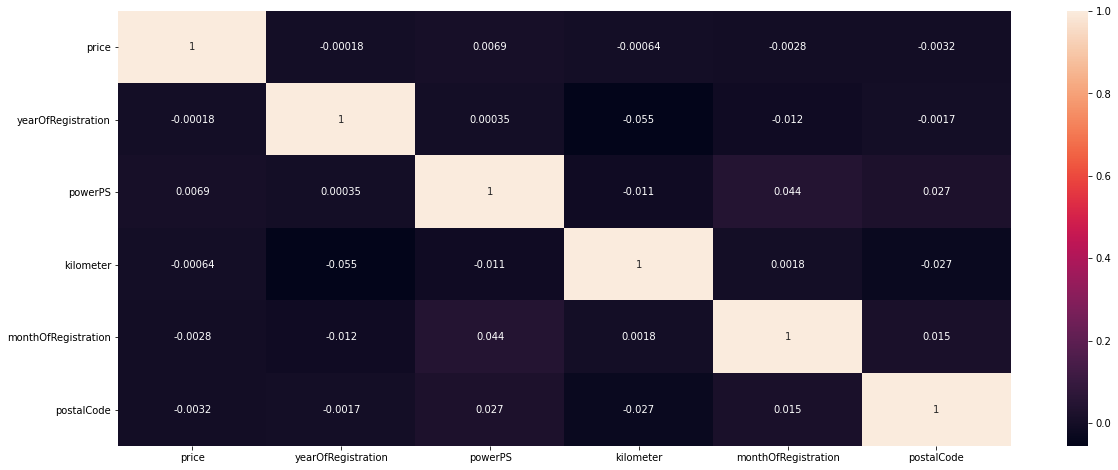

In [99]:
corr=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)

In [100]:
df1=df.drop(columns=['postalCode'],axis=1)
df1.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [101]:
df.head(1)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435


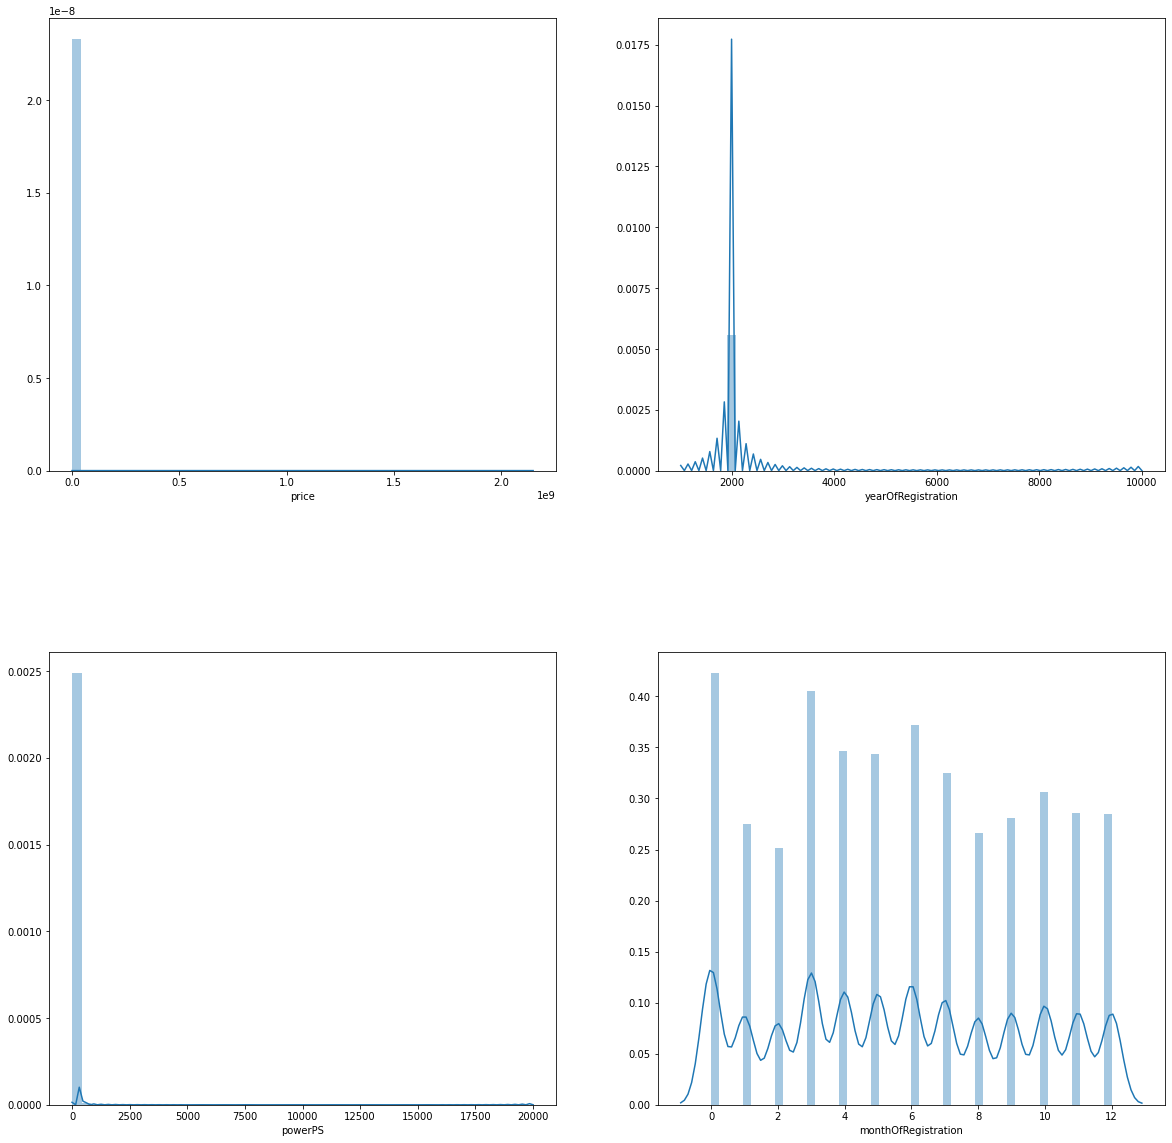

In [102]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.distplot(df1['price'],ax=axes[0][0])
sns.distplot(df1['yearOfRegistration'],ax=axes[0][1])
sns.distplot(df1['powerPS'],ax=axes[1][0])
sns.distplot(df1['monthOfRegistration'],ax=axes[1][1])
plt.subplots_adjust(hspace=0.4)

Maximum Cars are bought in between 1990 and 2018 and also in the month of april.

In [103]:
df1['price'].unique()

array([  480, 18300,  9800, ..., 18429, 24895, 10985])

In [104]:
df1['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

The minumum price of the car is 0 which is impossible again the price of the car can't be too much low.So we will drop the rows corresponding to the low prices.

In [105]:
df1['powerPS'].describe()

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

The same can be said for powerPS column so we can remove them also.

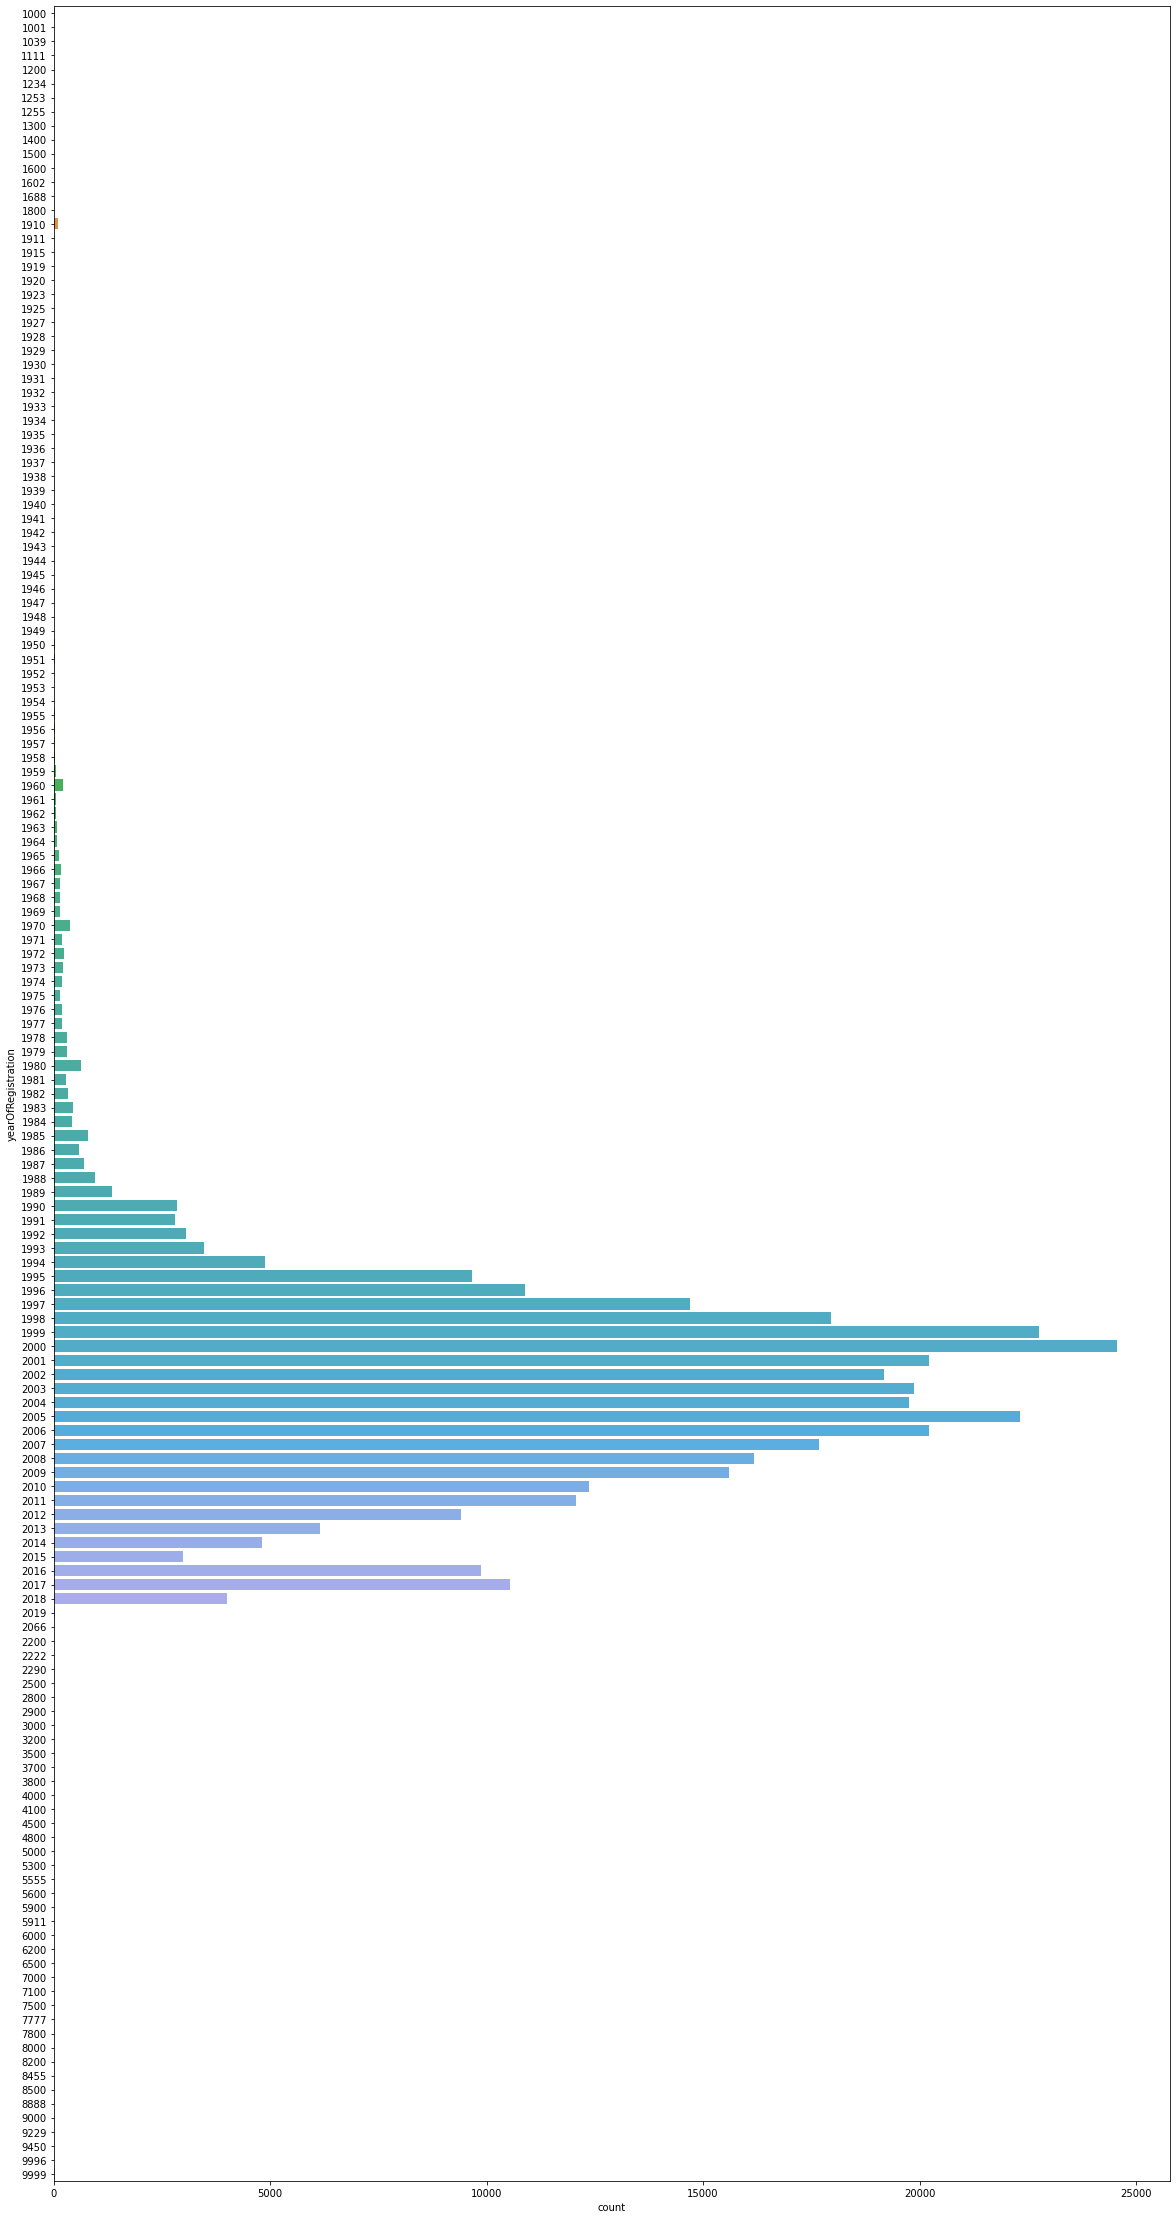

In [106]:
plt.figure(figsize=(20,40))
sns.countplot(y=df1['yearOfRegistration'])

Approximately most of the cars are sold in between 1980 and 2017

In [107]:
df1=df1[(df1.yearOfRegistration >= 1980) & (df1.yearOfRegistration <= 2017) &(df1.powerPS >= 70) & (df1.price >= 1000)]
df1.shape

(233651, 12)

In [108]:
df2=pd.get_dummies(data=df1,columns=['abtest','vehicleType','gearbox','model','brand','fuelType','notRepairedDamage'],drop_first=True)
df2.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_test,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manuell,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,...,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_nein
1,18300,2011,190,125000,5,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,9800,2004,163,125000,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1500,2001,75,150000,6,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
6,2200,2004,109,150000,8,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,14500,2014,125,30000,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
x=df2.drop(columns=['price'],axis=1)
y=df2['price'].values.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [111]:
x_train.shape

(186920, 304)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.fit_transform(y_test)


In [120]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(150,init='uniform',input_dim=304,activation='relu'))
model.add(Dense(150,activation='relu',init='uniform'))
model.add(Dense(1,activation='linear',init='uniform'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, input_dim=304, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(150, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  import sys


In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 150)               45750     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 68,551
Trainable params: 68,551
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [125]:
model_hist=model.fit(x_train,y_train,epochs=30)

Epoch 1/30
186920/186920 [==============================] - 11s 61us/step - loss: 19.3891
Epoch 2/30
186920/186920 [==============================] - 11s 60us/step - loss: 5.5844
Epoch 3/30
186920/186920 [==============================] - 11s 61us/step - loss: 13.2911
Epoch 4/30
186920/186920 [==============================] - 11s 61us/step - loss: 8.2678
Epoch 5/30
186920/186920 [==============================] - 12s 62us/step - loss: 6.6744
Epoch 6/30
186920/186920 [==============================] - 11s 61us/step - loss: 8.8136
Epoch 7/30
186920/186920 [==============================] - 11s 61us/step - loss: 3.1999
Epoch 8/30
186920/186920 [==============================] - 11s 61us/step - loss: 2.2987
Epoch 9/30
186920/186920 [==============================] - 11s 61us/step - loss: 5.3466
Epoch 10/30
186920/186920 [==============================] - 11s 61us/step - loss: 10.2918
Epoch 11/30
186920/186920 [==============================] - 12s 65us/step - loss: 1.8477
Epoch 12/30
1869

In [126]:
model_hist.history.keys()

dict_keys(['loss'])

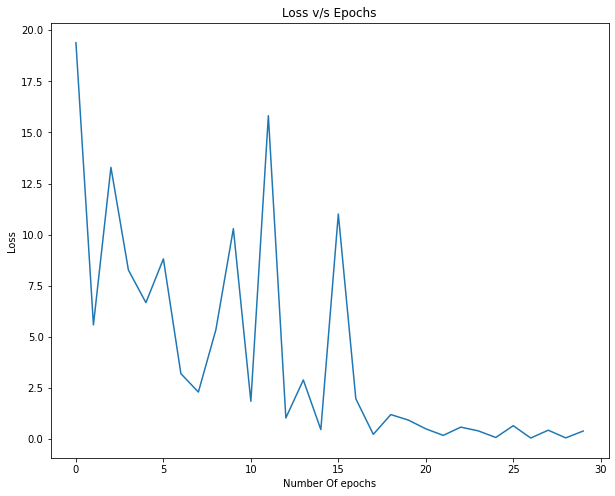

In [128]:
plt.figure(figsize=(10,8))
plt.title('Loss v/s Epochs')
plt.xlabel('Number Of epochs')
plt.ylabel('Loss')
plt.plot(model_hist.history['loss'])